In [41]:
import torch
import time
import os
import sys
import pandas as pd
sys.path.append("./birdsong")
from datasets.tools.sampling import upsample_df
from datasets.tools.augmentation import SoundscapeNoise
from datasets.tools.enhancement import exponent
from datasets.sequential import SpectralDataset
import matplotlib.pyplot as plt

INPUT_DIR = 'storage/signal_slices'
TRAIN = pd.read_csv('mel_slices_train.csv')
train_df = upsample_df(TRAIN, 400)

In [42]:
noiser = SoundscapeNoise('storage/noise_slices',scaling = 1)

In [43]:
ds_aug = SpectralDataset(train_df, INPUT_DIR, enhancement_func=exponent, augmentation_func=noiser)
ds_no_aug = SpectralDataset(train_df, INPUT_DIR, enhancement_func=exponent)

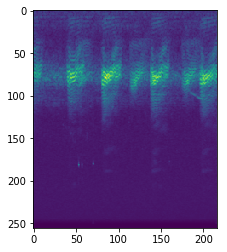

In [66]:
augmented = ds_aug[0][0]
not_augmented = ds_no_aug[0][0]
plt.imshow(augmented.squeeze())

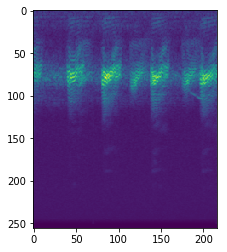

In [49]:
plt.imshow(not_augmented.squeeze())

In [7]:
import numpy as np
empty = np.zeros((256,216))
noise = noiser(empty)

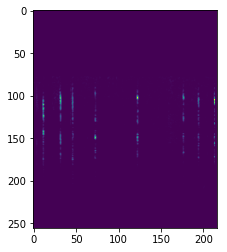

In [8]:
plt.imshow(noise)